## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("train_data.csv")
valid_data = pd.read_csv("valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(534, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(229, 2)


,Date,count
0,2014-02-09,196
1,2014-02-10,299
2,2014-02-11,224
3,2014-02-12,216
4,2014-02-13,212


# Required Preprocessing 

In [5]:
train_data["Date"] = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')


In [6]:
valid_data["Date"] = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')


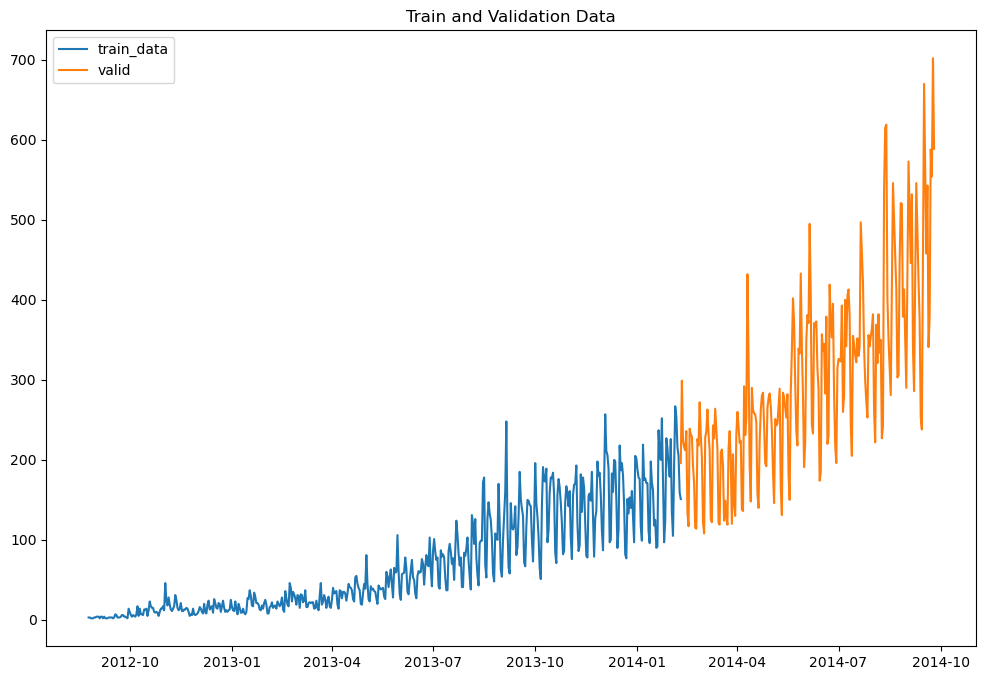

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Naive Model
Use the last (most recent) value of train as the predictions


<img src="naive formula.png" width=160 height=100 />

In [8]:
print(train_data.shape)
train_data.tail()

(534, 2)


,Date,count
529,2014-02-05,254
530,2014-02-06,216
531,2014-02-07,205
532,2014-02-08,159
533,2014-02-09,151


In [9]:
# indexing starts from 0
train_data['count'][533]

151

In [10]:
# Defining predictions for validation
valid_data['naive'] = train_data['count'][533]

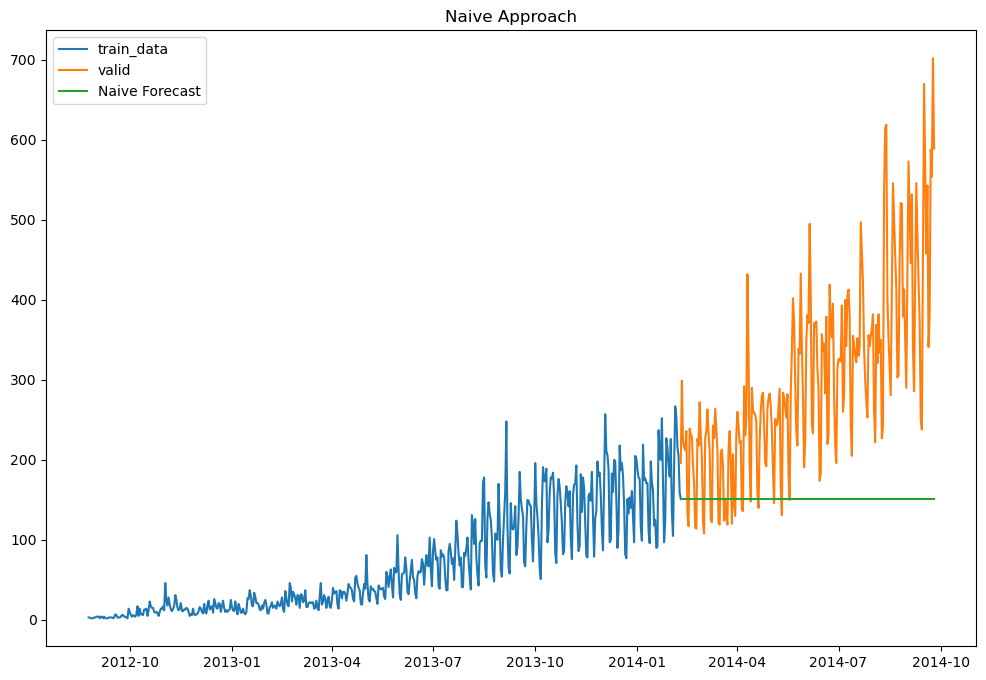

In [12]:
plt.figure(figsize=(12,8))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.plot(valid_data["Date"],valid_data['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Approach")
plt.show()

In [13]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['naive']))
print('The RMSE value for Naive Approach is', rmse)

The RMSE value for Naive Approach is 191.31604662004477


# Simple Average

Taking average of the complete data

In [14]:
train_data['count'].mean()

68.62734082397004

In [15]:
# Defining predictions for validation
valid_data['average_complete'] = train_data['count'].mean()

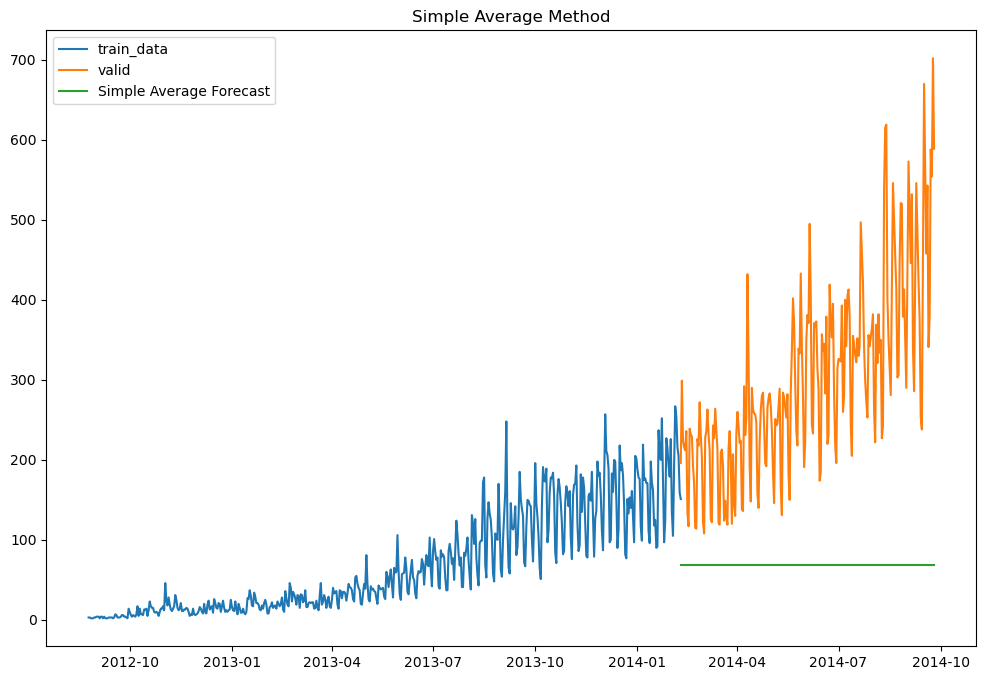

In [16]:
plt.figure(figsize=(12,8))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.plot(valid_data["Date"],valid_data['average_complete'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [17]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_complete']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 261.1243597659878


The initial values in the train data are smaller. Instead of taking the average of the complete data, we should take the average of only the recent values in order to make the predictions. 

In [18]:
train_data.tail(20)

,Date,count
514,2014-01-21,207
515,2014-01-22,200
516,2014-01-23,252
517,2014-01-24,178
518,2014-01-25,97
519,2014-01-26,123
520,2014-01-27,227
521,2014-01-28,215
522,2014-01-29,193
523,2014-01-30,179


In [19]:
last_20 = (train_data['count'][514:533]).values
print('Lask 20 values are:', last_20)
print('Average for last_20 is', last_20.mean())

Lask 20 values are: [207 200 252 178  97 123 227 215 193 179 226 134 105 191 267 254 216 205
 159]
Average for last_20 is 190.94736842105263


In [20]:
# Defining predictions for validation
valid_data['avg_last_20'] = last_20.mean()

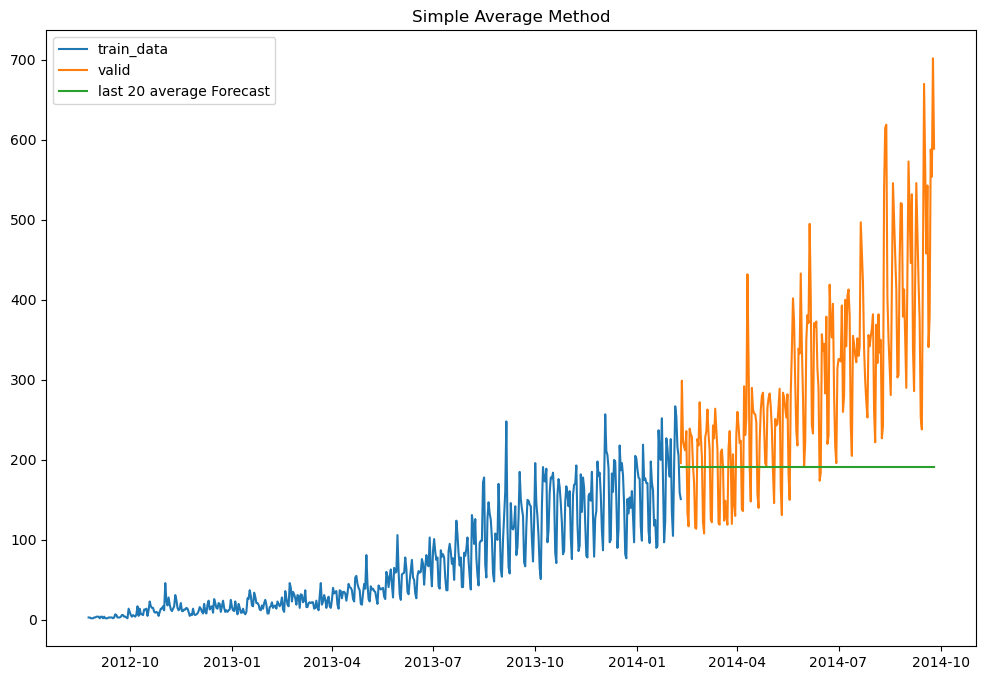

In [21]:
plt.figure(figsize=(12,8))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.plot(valid_data["Date"],valid_data['avg_last_20'], label='last 20 average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [22]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['avg_last_20']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 161.77514113365635
